In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ƒê·ªçc d·ªØ li·ªáu
data = pd.read_csv("data/3MonthTreasury.csv", parse_dates=["Date"], index_col="Date")
data = data.sort_index()

# Ch·ªçn c·ªôt Adj Close ƒë·ªÉ ph√¢n t√≠ch
adj_close = data["Adj Close"]

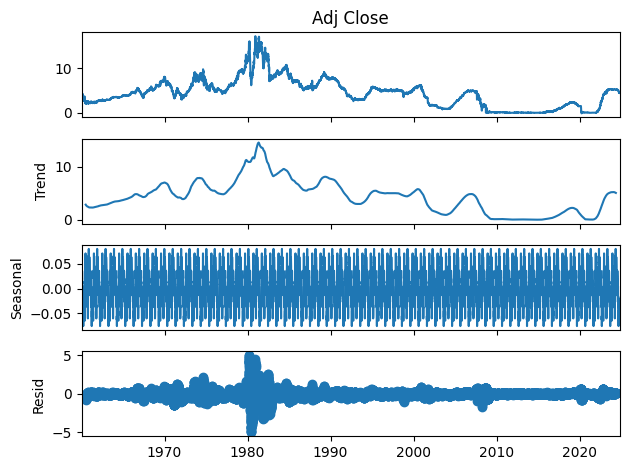

In [ ]:
# Ph√¢n t√≠ch xu h∆∞·ªõng v√† th√†nh ph·∫ßn
# S·ª≠ d·ª•ng bi·ªÉu ƒë·ªì ph√¢n r√£ (decomposition) ƒë·ªÉ th·∫•y r√µ xu h∆∞·ªõng (trend), m√πa v·ª• (seasonality), v√† ph·∫ßn d∆∞ (residuals).

from statsmodels.tsa.seasonal import seasonal_decompose

# Ph√¢n r√£ chu·ªói th·ªùi gian
decomposition = seasonal_decompose(adj_close, model="additive", period=252)  # 252 ng√†y = 1 nƒÉm giao d·ªãch
decomposition.plot()
# plt.title("Decomposition of Time Series (Adj Close)")
plt.show()

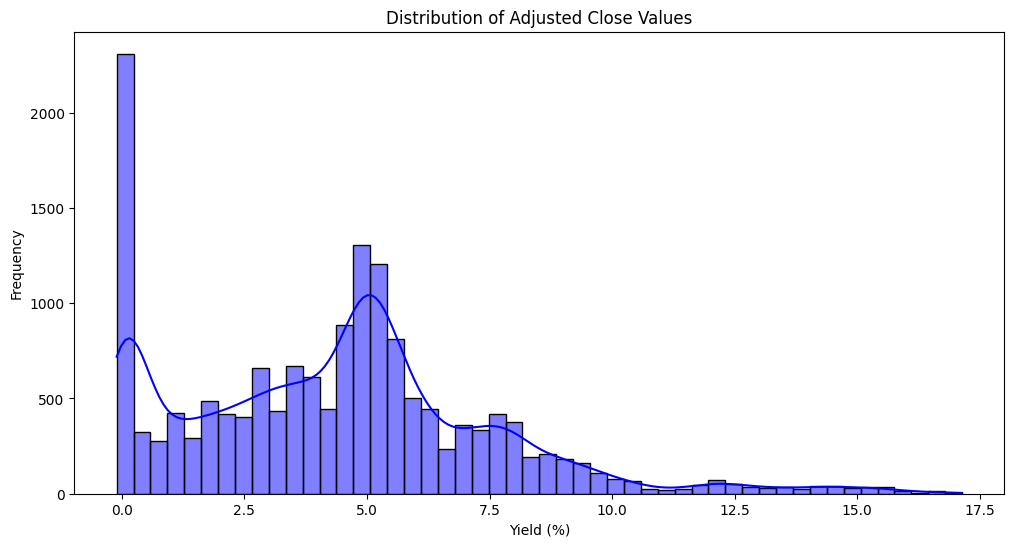

In [ ]:
# Ph√¢n ph·ªëi d·ªØ li·ªáu
# D√πng histogram v√† ƒë∆∞·ªùng KDE ƒë·ªÉ ki·ªÉm tra ph√¢n ph·ªëi c·ªßa l·ª£i su·∫•t.
# D·ªÖ d√†ng nh·∫≠n bi·∫øt d·ªØ li·ªáu c√≥ ph√¢n ph·ªëi chu·∫©n hay kh√¥ng, c≈©ng nh∆∞ s·ª± t·ªìn t·∫°i c·ªßa c√°c gi√° tr·ªã ngo·∫°i lai.

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(adj_close, kde=True, bins=50, color="blue")
plt.title("Distribution of Adjusted Close Values")
plt.xlabel("Yield (%)")
plt.ylabel("Frequency")
plt.show()

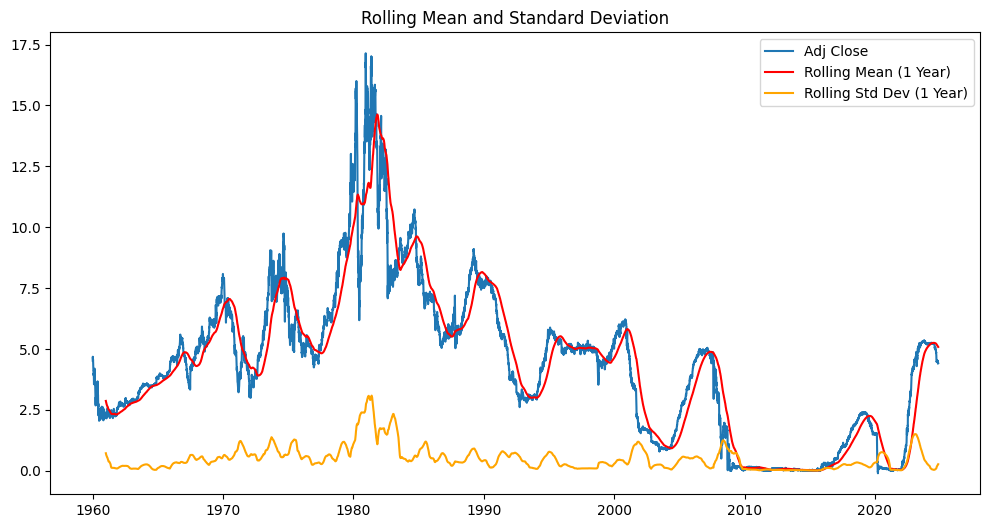

In [6]:
# T√≠nh b·∫•t ·ªïn ƒë·ªãnh
# S·ª≠ d·ª•ng rolling mean v√† rolling standard deviation ƒë·ªÉ xem x√©t s·ª± thay ƒë·ªïi bi·∫øn ƒë·ªông.
# Cho th·∫•y li·ªáu chu·ªói th·ªùi gian c√≥ ·ªïn ƒë·ªãnh hay kh√¥ng, gi√∫p ƒë√°nh gi√° t√≠nh d·ª´ng (stationarity).

rolling_mean = adj_close.rolling(window=252).mean()
rolling_std = adj_close.rolling(window=252).std()

plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Adj Close")
plt.plot(rolling_mean, label="Rolling Mean (1 Year)", color="red")
plt.plot(rolling_std, label="Rolling Std Dev (1 Year)", color="orange")
plt.title("Rolling Mean and Standard Deviation")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

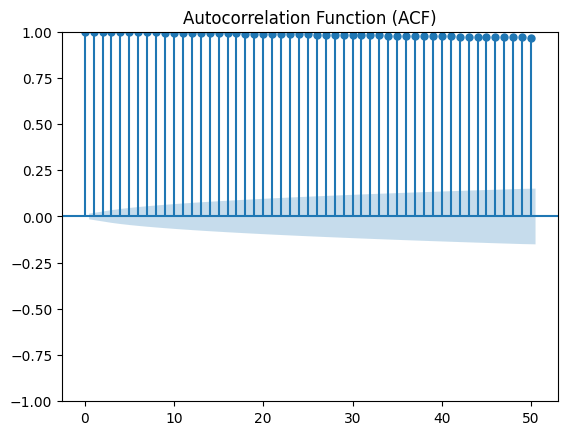

<Figure size 1200x600 with 0 Axes>

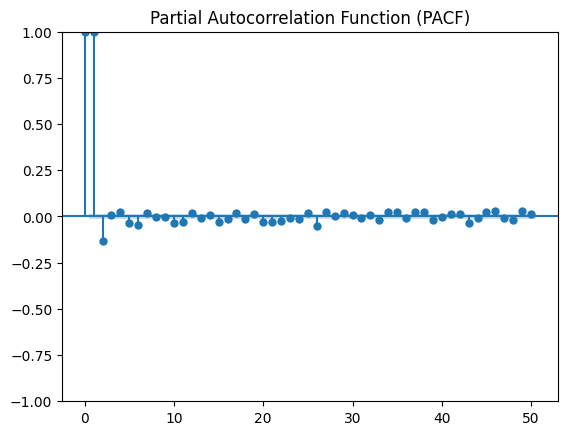

In [ ]:
# H√†m t·ª± t∆∞∆°ng quan v√† t·ª± t∆∞∆°ng quan ri√™ng ph·∫ßn (ACF & PACF)
# Ph√¢n t√≠ch ACF v√† PACF ƒë·ªÉ xem x√©t m·ªëi quan h·ªá gi·ªØa c√°c gi√° tr·ªã lag.
# Bi·ªÉu ƒë·ªì ACF v√† PACF gi√∫p x√°c ƒë·ªãnh ƒë·ªô tr·ªÖ n√†o ·∫£nh h∆∞·ªüng nhi·ªÅu nh·∫•t, h·ªØu √≠ch trong vi·ªác ch·ªçn m√¥ h√¨nh ARIMA ho·∫∑c AR.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(adj_close.dropna(), lags=50)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(adj_close.dropna(), lags=50)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


<Figure size 1200x600 with 0 Axes>

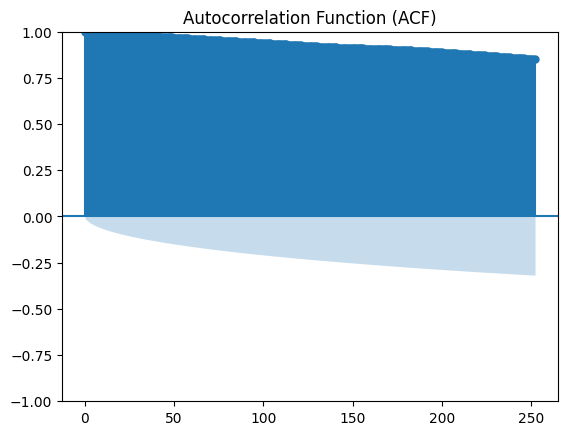

<Figure size 1200x600 with 0 Axes>

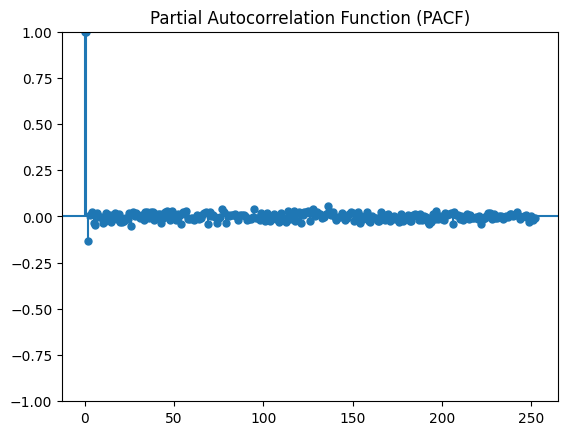

In [9]:
# H√†m t·ª± t∆∞∆°ng quan v√† t·ª± t∆∞∆°ng quan ri√™ng ph·∫ßn (ACF & PACF)
# Ph√¢n t√≠ch ACF v√† PACF ƒë·ªÉ xem x√©t m·ªëi quan h·ªá gi·ªØa c√°c gi√° tr·ªã lag.
# Bi·ªÉu ƒë·ªì ACF v√† PACF gi√∫p x√°c ƒë·ªãnh ƒë·ªô tr·ªÖ n√†o ·∫£nh h∆∞·ªüng nhi·ªÅu nh·∫•t, h·ªØu √≠ch trong vi·ªác ch·ªçn m√¥ h√¨nh ARIMA ho·∫∑c AR.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(adj_close.dropna(), lags=252)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(adj_close.dropna(), lags=252)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


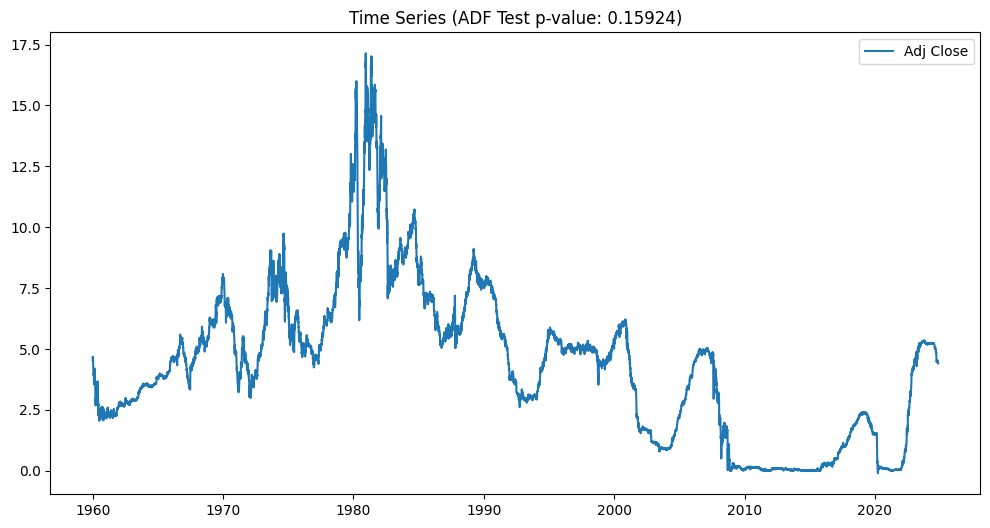

In [ ]:
# Ki·ªÉm tra t√≠nh d·ª´ng
# S·ª≠ d·ª•ng bi·ªÉu ƒë·ªì xu h∆∞·ªõng ƒë·ªÉ tr·ª±c quan h√≥a v√† ki·ªÉm tra t√≠nh d·ª´ng.
# N·∫øu chu·ªói c√≥ xu h∆∞·ªõng r√µ r√†ng, c·∫ßn th·ª±c hi·ªán ph√©p sai ph√¢n ƒë·ªÉ l√†m d·ª´ng chu·ªói.

from statsmodels.tsa.stattools import adfuller

result = adfuller(adj_close.dropna())
plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Adj Close")
plt.title(f"Time Series (ADF Test p-value: {result[1]:.5f})")
plt.legend()
plt.show()

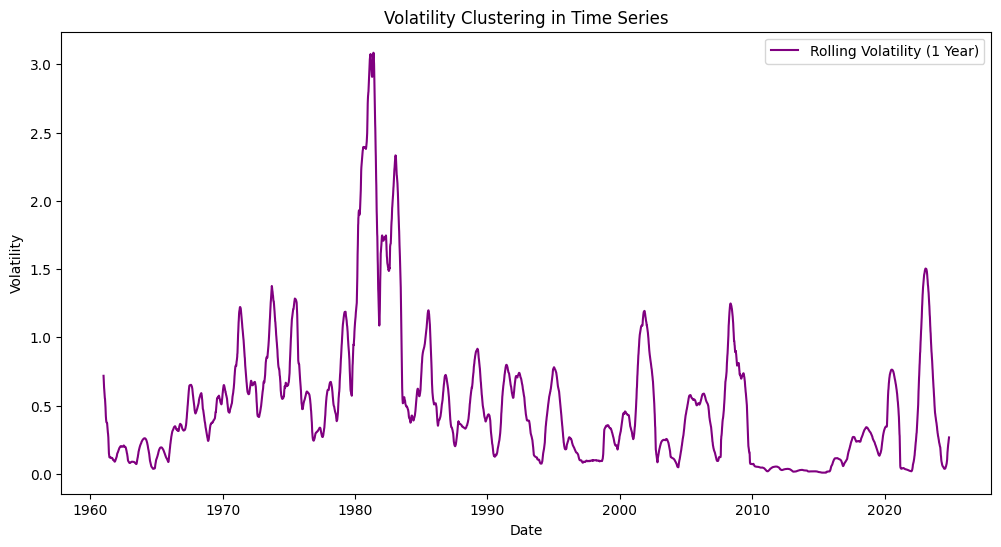

In [11]:
# Ki·ªÉm tra volatility clustering
# S·ª≠ d·ª•ng rolling standard deviation ƒë·ªÉ nh·∫≠n di·ªán c·ª•m bi·∫øn ƒë·ªông.
# D·ªØ li·ªáu t√†i ch√≠nh th∆∞·ªùng c√≥ c·ª•m bi·∫øn ƒë·ªông, ƒëi·ªÅu n√†y g·ª£i √Ω m√¥ h√¨nh ARCH/GARCH.
rolling_volatility = adj_close.rolling(window=252).std()

plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, label="Rolling Volatility (1 Year)", color="purple")
plt.title("Volatility Clustering in Time Series")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


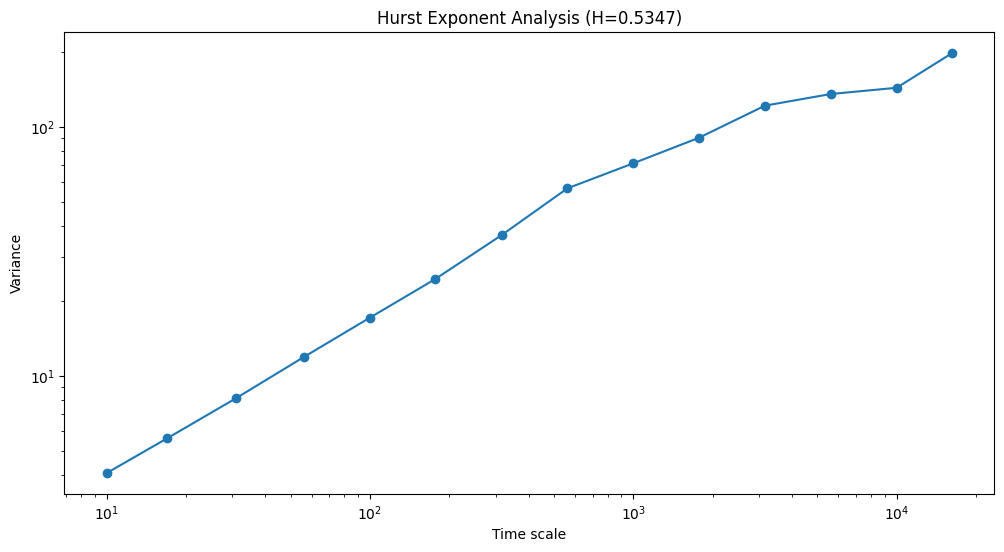

In [12]:
# Ph√¢n t√≠ch Hurst Exponent
# Hurst Exponent gi√∫p ƒë√°nh gi√° chu·ªói th·ªùi gian c√≥ xu h∆∞·ªõng (trend-following) hay mean-reverting.
# Bi·ªÉu ƒë·ªì log-log cho th·∫•y c√°ch ph∆∞∆°ng sai thay ƒë·ªïi theo th·ªùi gian, h·ªó tr·ª£ ƒë√°nh gi√° t√≠nh ng·∫´u nhi√™n c·ªßa chu·ªói.

from hurst import compute_Hc

H, c, data = compute_Hc(adj_close.dropna())
plt.figure(figsize=(12, 6))
plt.loglog(data[0], data[1], marker="o")
plt.title(f"Hurst Exponent Analysis (H={H:.4f})")
plt.xlabel("Time scale")
plt.ylabel("Variance")
plt.show()


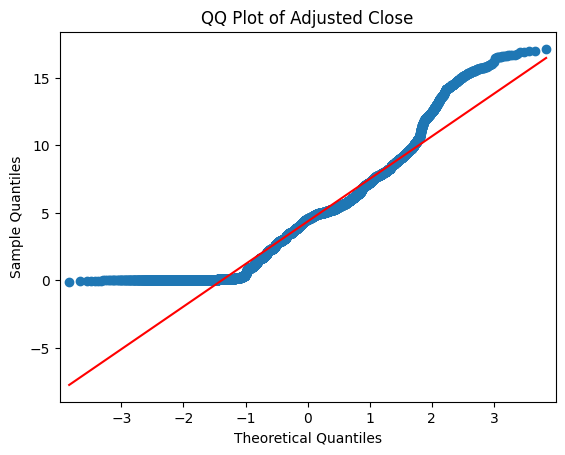

In [13]:
# Bi·ªÉu ƒë·ªì QQ-Plot
# Ki·ªÉm tra t√≠nh chu·∫©n c·ªßa chu·ªói th·ªùi gian.
# D·ªØ li·ªáu l·ªách kh·ªèi ƒë∆∞·ªùng chu·∫©n g·ª£i √Ω ph√¢n ph·ªëi kh√¥ng chu·∫©n, c·∫ßn x·ª≠ l√Ω tr∆∞·ªõc khi √°p d·ª•ng m√¥ h√¨nh.

import statsmodels.api as sm

sm.qqplot(adj_close.dropna(), line="s")
plt.title("QQ Plot of Adjusted Close")
plt.show()


In [ ]:
# X√°c ƒë·ªãnh t√≠nh d·ª´ng ho·∫∑c th·ª±c hi·ªán ph√©p sai ph√¢n n·∫øu c·∫ßn.
# S·ª≠ d·ª•ng ACF v√† PACF ƒë·ªÉ ch·ªçn m√¥ h√¨nh ARIMA ho·∫∑c AR ph√π h·ª£p.
# N·∫øu c√≥ volatility clustering, xem x√©t ARCH/GARCH.
# N·∫øu Hurst Exponent > 0.5, m√¥ h√¨nh LSTM c√≥ th·ªÉ l√† l·ª±a ch·ªçn t·ªët.

### **1. ƒê·∫∑c ƒëi·ªÉm d·ªØ li·ªáu: T√≥m t·∫Øt**
T·ª´ c√°c ph√¢n t√≠ch:
1. **Kh√¥ng d·ª´ng**: K·∫øt qu·∫£ ki·ªÉm ƒë·ªãnh ADF (p-value = 0.15924) kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt g·ªëc, chu·ªói c√≥ th·ªÉ kh√¥ng d·ª´ng.
2. **T√≠nh t·ª± t∆∞∆°ng quan m·∫°nh**: ACF k√©o d√†i r·∫•t l√¢u, cho th·∫•y d·∫•u hi·ªáu chu·ªói c√≥ xu h∆∞·ªõng m·∫°nh ho·∫∑c hi·ªáu ·ª©ng b·ªô nh·ªõ d√†i.
3. **PACF**: Ch·ªâ r√µ c√°c gi√° tr·ªã lag ƒë·∫ßu (0, 1, v√† 2) c√≥ √Ω nghƒ©a, g·ª£i √Ω c·∫•u tr√∫c t·ª± h·ªìi quy m·∫°nh ·ªü ƒë·ªô tr·ªÖ th·∫•p.
4. **Ph∆∞∆°ng sai thay ƒë·ªïi**: Rolling std bi·∫øn ƒë·ªông m·∫°nh ·ªü c√°c giai ƒëo·∫°n kh·ªßng ho·∫£ng, c√≥ th·ªÉ ph√π h·ª£p v·ªõi ARCH/GARCH.
5. **Volatility clustering**: Ph√π h·ª£p v·ªõi c√°c m√¥ h√¨nh m√¥ h√¨nh h√≥a ph∆∞∆°ng sai bi·∫øn ƒë·ªông.
6. **Hurst Exponent (H = 0.5347)**: G·∫ßn 0.5, cho th·∫•y chu·ªói c√≥ th·ªÉ l√† chuy·ªÉn ƒë·ªông ng·∫´u nhi√™n v·ªõi d·∫•u hi·ªáu mean-reverting nh·∫π.
7. **M√πa v·ª•**: Xu h∆∞·ªõng m√πa v·ª• r√µ r√†ng, c·∫ßn xem x√©t th√™m c√°c m√¥ h√¨nh c√≥ th√†nh ph·∫ßn chu k·ª≥ ho·∫∑c l√†m m·ªãn.

---

### **2. L·ª±a ch·ªçn m√¥ h√¨nh: H∆∞·ªõng ti·∫øp c·∫≠n**
D·ª±a tr√™n c√°c ƒë·∫∑c ƒëi·ªÉm tr√™n, t√¥i ƒë·ªÅ xu·∫•t th·ª≠ nghi·ªám theo t·ª´ng nh√≥m m√¥ h√¨nh, t·ª´ ƒë∆°n gi·∫£n ƒë·∫øn ph·ª©c t·∫°p:

#### **Nh√≥m 1: M√¥ h√¨nh c∆° b·∫£n**
1. **Na√Øve Methods (Persistence Models)**: D·ª± b√°o gi√° tr·ªã t∆∞∆°ng lai b·∫±ng gi√° tr·ªã g·∫ßn nh·∫•t (na√Øve) ho·∫∑c trung b√¨nh di ƒë·ªông.
2. **Exponential Smoothing**:
   - D√πng ƒë·ªÉ x·ª≠ l√Ω xu h∆∞·ªõng v√† m√πa v·ª•.
   - C√°c m√¥ h√¨nh nh∆∞ Holt-Winters (Triple Exponential Smoothing) ph√π h·ª£p v·ªõi chu·ªói c√≥ xu h∆∞·ªõng v√† th√†nh ph·∫ßn m√πa v·ª•.

#### **Nh√≥m 2: M√¥ h√¨nh tuy·∫øn t√≠nh**
1. **ARIMA**: V·ªõi ƒë·ªô d·ª´ng ch∆∞a r√µ r√†ng, th·ª≠ nghi·ªám ARIMA(p, d, q) b·∫±ng c√°ch:
   - T·∫°o sai ph√¢n l·∫ßn 1 ƒë·ªÉ l√†m d·ª´ng chu·ªói.
   - S·ª≠ d·ª•ng ACF v√† PACF ƒë·ªÉ ∆∞·ªõc l∆∞·ª£ng p, q.
2. **SARIMA**: B·ªï sung th√†nh ph·∫ßn m√πa v·ª•.
3. **ARIMAX**: Th√™m bi·∫øn gi·∫£i th√≠ch b√™n ngo√†i (n·∫øu c√≥ th√¥ng tin kh√°c nh∆∞ GDP, CPI).

#### **Nh√≥m 3: M√¥ h√¨nh phi tuy·∫øn**
1. **ARCH/GARCH**:
   - Ph√π h·ª£p v·ªõi volatility clustering v√† ph∆∞∆°ng sai thay ƒë·ªïi.
2. **EGARCH ho·∫∑c GJR-GARCH**:
   - N·∫øu c√≥ d·∫•u hi·ªáu b·∫•t ƒë·ªëi x·ª©ng (leverage effect).

#### **Nh√≥m 4: M√¥ h√¨nh h·ªçc s√¢u**
1. **LSTM**:
   - T·ªëi ∆∞u v·ªõi chu·ªói th·ªùi gian d√†i, c√≥ hi·ªáu ·ª©ng b·ªô nh·ªõ.
2. **Transformer**:
   - Ph√π h·ª£p v·ªõi chu·ªói ph·ª©c t·∫°p v√† m·ªëi li√™n h·ªá d√†i h·∫°n.
3. **Hybrid Models**:
   - K·∫øt h·ª£p LSTM/GRU v·ªõi ARIMA ho·∫∑c c√°c m√¥ h√¨nh kh√°c ƒë·ªÉ t·∫≠n d·ª•ng ∆∞u ƒëi·ªÉm c·ªßa c·∫£ hai.

---

### **3. Quy tr√¨nh th·ª±c nghi·ªám**
#### **B∆∞·ªõc 1: Chu·∫©n b·ªã d·ªØ li·ªáu**
- Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu:
  - Sai ph√¢n l·∫ßn 1 ƒë·ªÉ l√†m d·ª´ng chu·ªói.
  - Standardize d·ªØ li·ªáu ƒë·ªÉ x·ª≠ l√Ω volatility.
- Chia d·ªØ li·ªáu:
  - 70% ƒë·ªÉ hu·∫•n luy·ªán, 30% ki·ªÉm tra.
  - Th·ª≠ nghi·ªám k·ªãch b·∫£n rolling window ƒë·ªÉ ƒë√°nh gi√° d·ª± b√°o qua th·ªùi gian.

#### **B∆∞·ªõc 2: ƒê√°nh gi√° m√¥ h√¨nh**
- S·ª≠ d·ª•ng c√°c ch·ªâ s·ªë ch√≠nh ƒë·ªÉ ƒë√°nh gi√°:
  - **RMSE, MAE**: ƒê√°nh gi√° sai s·ªë.
  - **MAPE**: ƒê·∫∑c bi·ªát quan tr·ªçng trong d·ªØ li·ªáu t√†i ch√≠nh.
  - **Diebold-Mariano Test**: So s√°nh m√¥ h√¨nh d·ª± b√°o.
- Tr·ª±c quan h√≥a k·∫øt qu·∫£ d·ª± b√°o v√† ph·∫ßn d∆∞.

---

### **4. Tr·ª±c quan h√≥a th√™m**
ƒê·ªÉ h·ªó tr·ª£ ƒë√°nh gi√° t·ªët h∆°n, b·∫°n c√≥ th·ªÉ:
1. Bi·ªÉu ƒë·ªì rolling mean/std t·ª´ng giai ƒëo·∫°n kh·ªßng ho·∫£ng.
2. So s√°nh d·ª± b√°o v·ªõi d·ªØ li·ªáu th·ª±c t·∫ø theo th·ªùi gian.
3. Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi ph·∫ßn d∆∞ c·ªßa t·ª´ng m√¥ h√¨nh.
üòä